# D200, Problem Set 1: Introduction to PyTorch

Due: 5 Feb 2026 [here](https://classroom.github.com/a/kQo2Kl0l) in
groups of up to 2 (solo or one partner).

Stefan Bucher

This problem set introduces PyTorch, the deep learning framework we will
use throughout the course. You will learn to work with tensors, use
automatic differentiation, implement a training loop, and build a neural
network.

# Problem 1: Tensors and Automatic Differentiation

PyTorch tensors are similar to NumPy arrays but can run on GPUs and
support automatic differentiation. In this problem, you will explore
tensor operations and PyTorch’s autograd system.

**(1a)** Create the following tensors and perform the specified
operations:

1.  Create a tensor `a` containing the values \[1.0, 2.0, 3.0, 4.0,
    5.0\]
2.  Create a 3×3 tensor `B` filled with ones
3.  Reshape `a` to a 5×1 column vector
4.  Compute the element-wise square of `a`
5.  Compute the matrix product of `B` with itself



In [10]:
import torch
a = torch.Tensor([1.0, 2.0, 3.0, 4.0, 5.0])
b = torch.ones(3,3)
a = torch.reshape(a, (5,1))
square = torch.square(a)
product = torch.matmul(b, b)

**(1b)** PyTorch’s automatic differentiation (autograd) computes
gradients automatically. Consider the function $f(x) = x^2 + 3x + 1$.

1.  Compute $\frac{df}{dx}$ analytically. What is its value at $x = 2$?
2.  Create a tensor `x = torch.tensor([2.0], requires_grad=True)` and
    compute `y = x**2 + 3*x + 1`
3.  Call `y.backward()` to compute the gradient, then print `x.grad`
4.  Verify that PyTorch’s gradient matches your analytical result



In [ ]:
# f'(x) = 2x+3; f(2) = 7
x = torch.tensor([2.0], requires_grad=True)
y = x**2 + 3*x +1
y.backward()
print(x.grad)
# matches the analytical result

tensor([7.])


**(1c)** Consider the function $g(x, y) = x^2 y + y^3$.

1.  Compute $\frac{\partial g}{\partial x}$ and
    $\frac{\partial g}{\partial y}$ analytically
2.  Use PyTorch to compute both partial derivatives at $(x, y) = (1, 2)$
3.  Verify the results match

In [20]:
# g'(x, y)_x = 2xy
# g'(x, y)_y = x^2 + 3y^2
xy = torch.tensor([1.0, 2.0], requires_grad=True)
x, y = xy
g = x**2 * y + y**3
g.backward()
print(xy.grad)
#results match


tensor([ 4., 13.])


# Problem 2: Linear Regression in PyTorch

In this problem, you will implement linear regression using PyTorch’s
neural network modules and optimizers.

In [21]:
# Generate synthetic data for linear regression
n_samples = 100
true_weight = 3.5
true_bias = 1.2

X = torch.randn(n_samples, 1)
y = true_weight * X + true_bias + 0.3 * torch.randn(n_samples, 1)

**(2a)** Visualize the data, then create a linear regression model using
`nn.Linear`. This module implements $\hat{y} = Wx + b$ where $W$
(weight) and $b$ (bias) are learnable parameters.

1.  Create a model: `model = nn.Linear(in_features=1, out_features=1)`
2.  Print the initial (random) weight and bias using `model.weight` and
    `model.bias`
3.  Make predictions on `X` using `model(X)` and plot them alongside the
    true data



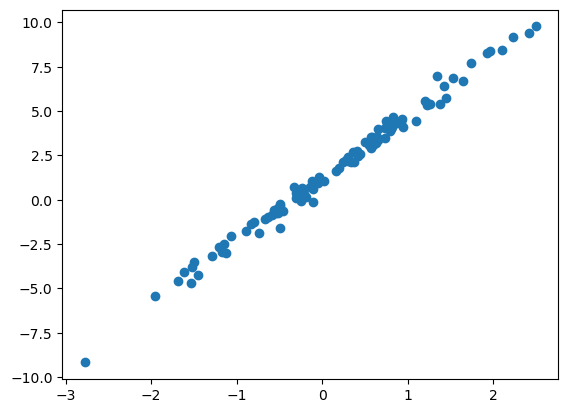

In [35]:
# visualise the data
import matplotlib.pyplot as plt 

plt.scatter(X, y)
plt.show()

Weight: -0.9019684791564941
Bias: 0.15029406547546387


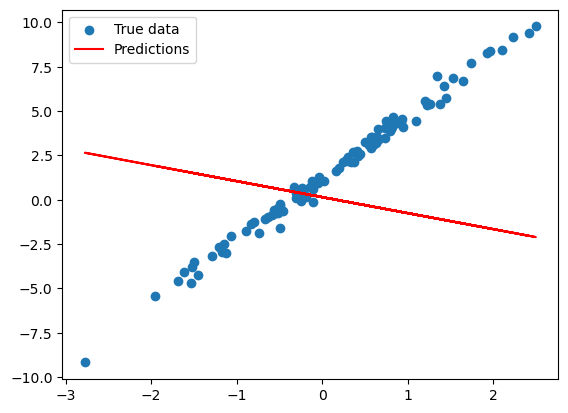

In [40]:
from torch import nn
model = nn.Linear(in_features=1, out_features=1)
print(f"Weight: {model.weight.item()}")
print(f"Bias: {model.bias.item()}")

with torch.no_grad():
    predictions = model(X)

plt.scatter(X, y, label='True data')
plt.plot(X, predictions, 'r-', label='Predictions')
plt.legend()
plt.show()

**(2b)** Implement the training loop to fit the model. Use:

-   Loss function: `nn.MSELoss()`
-   Optimizer: `optim.SGD(model.parameters(), lr=0.1)`
-   Train for 100 epochs

The training loop should follow this pattern:

``` python
for epoch in range(n_epochs):
    # 1. Forward pass: compute predictions
    # 2. Compute loss
    # 3. Zero gradients: optimizer.zero_grad()
    # 4. Backward pass: loss.backward()
    # 5. Update parameters: optimizer.step()
```

Store the loss at each epoch and plot the loss curve.



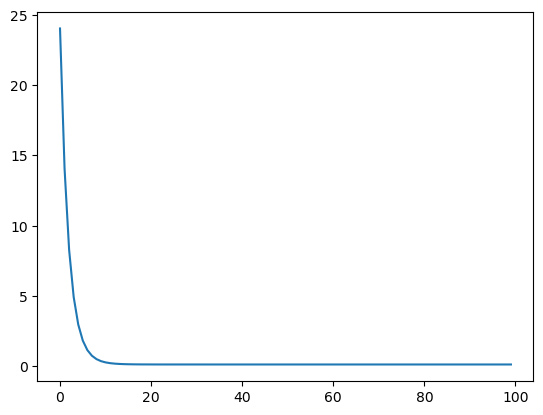

In [41]:
import torch.optim as optim
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)
n_epochs = 100
losses = []
for epoch in range(n_epochs):
    # forward pass
    outputs = model(X)
    loss = criterion(outputs, y)
    
    # backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item()) 

plt.plot(losses)
plt.show()

**(2c)** After training:

1.  Print the learned weight and bias
2.  Compute the analytical OLS solution:
    $\hat{\beta} = (X^\top X)^{-1} X^\top y$ (hint: add a column of ones
    for the intercept)
3.  Compare the SGD estimates to both the OLS solution and the true
    values (3.5 and 1.2)
4.  Plot the learned regression line alongside the data



Learned weight: 3.500199794769287
Learned bias: 1.2146934270858765
OLS Intercept (bias): 1.2146934270858765
OLS Weight: 3.500199794769287


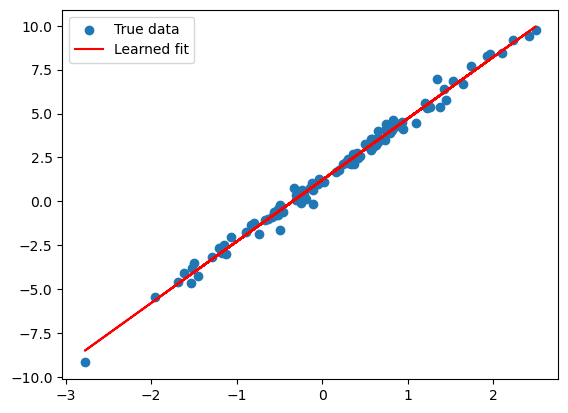

In [46]:
print(f"Learned weight: {model.weight.item()}")
print(f"Learned bias: {model.bias.item()}")
X_with_intercept = torch.cat([torch.ones(X.shape[0], 1), X], dim=1)
solution = torch.linalg.lstsq(X_with_intercept, y)
coefficients = solution.solution.flatten()
print("OLS Intercept (bias):", coefficients[0].item())
print("OLS Weight:", coefficients[1].item())

with torch.no_grad():
    predictions = model(X)

plt.scatter(X, y, label='True data')
plt.plot(X, predictions, 'r-', label='Learned fit')
plt.legend()
plt.show()

**(2d)** Compare SGD with the Adam optimizer (`optim.Adam`). Retrain the
model with both optimizers and plot their loss curves. Which converges
faster?



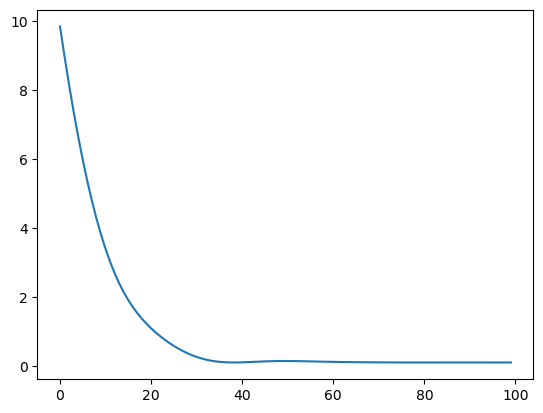

In [59]:
model_adam = nn.Linear(in_features=1, out_features=1)
criterion = nn.MSELoss()
optimizer = optim.Adam(model_adam.parameters(), lr=0.1)
n_epochs = 100
losses = []
for epoch in range(n_epochs):
    # forward pass
    outputs = model_adam(X)
    loss = criterion(outputs, y)
    
    # backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item()) 

plt.plot(losses)
plt.show()



# Problem 3: Multi-Layer Perceptron on MNIST

In this problem, you will build a multi-layer perceptron (MLP) to
classify handwritten digits from the MNIST dataset.

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



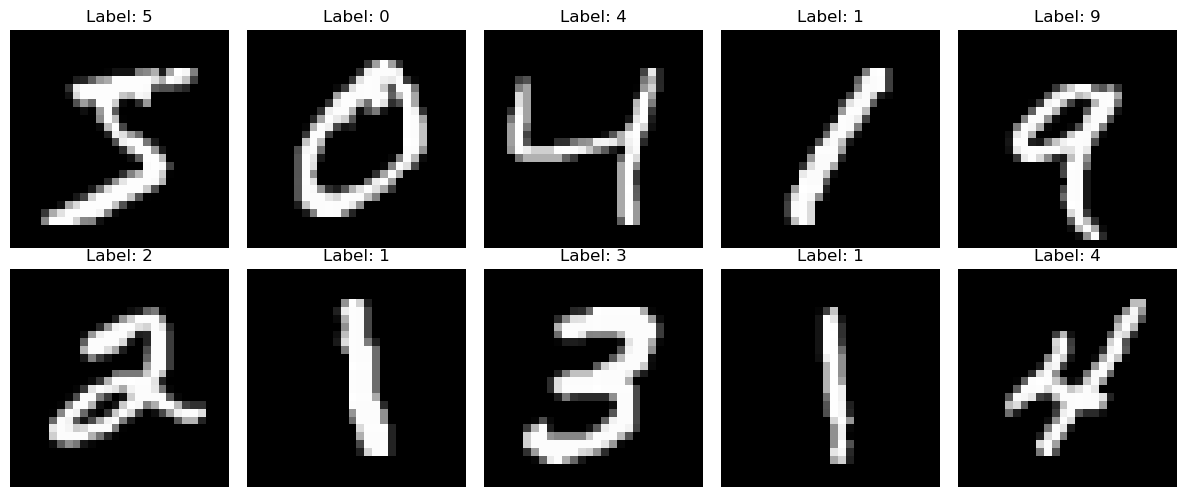

Training samples: 60000
Test samples: 10000
Image shape: torch.Size([1, 28, 28])


In [48]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Load MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # MNIST mean and std
])

train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

# Visualize some examples
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    img, label = train_dataset[i]
    ax.imshow(img.squeeze(), cmap='gray')
    ax.set_title(f'Label: {label}')
    ax.axis('off')
plt.tight_layout()
plt.show()

print(f"Training samples: {len(train_dataset)}")
print(f"Test samples: {len(test_dataset)}")
print(f"Image shape: {train_dataset[0][0].shape}")

**(3a)** Build an MLP with the following architecture using
`nn.Sequential`:

-   Input: 784 features (28×28 flattened image)
-   Hidden layer 1: 256 units, ReLU activation
-   Hidden layer 2: 128 units, ReLU activation
-   Output: 10 units (one per digit class)

Print the model architecture and count the total number of parameters.



In [ ]:
model = nn.Sequential(
    nn.Flatten(), 
    nn.Linear(784, 256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

print(model)
print(f"\nTotal parameters: {sum(p.numel() for p in model.parameters())}")

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=128, bias=True)
  (4): ReLU()
  (5): Linear(in_features=128, out_features=10, bias=True)
)

Total parameters: 235146


**(3b)** Train the model:

-   Loss function: `nn.CrossEntropyLoss()` (combines softmax and
    negative log-likelihood)
-   Optimizer: `optim.Adam(model.parameters(), lr=0.001)`
-   Train for 5 epochs

For each epoch, compute and print:

1.  Average training loss
2.  Training accuracy
3.  Test accuracy

Use this helper function to compute accuracy:

In [53]:
def compute_accuracy(model, data_loader):
    model.eval()  # Sets evaluation mode (disables dropout/batchnorm training behavior)
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

n_epochs = 5
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
losses = []
train_accs = []
test_accs = []

for epoch in range(n_epochs):
    model.train()
    train_loss = 0
    train_correct = 0
    train_total = 0
    
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Track metrics
        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()
    
    # Compute epoch metrics
    avg_loss = train_loss / len(train_loader)
    train_acc = 100 * train_correct / train_total
    test_acc = compute_accuracy(model, test_loader)
    losses.append(avg_loss)
    train_accs.append(train_acc)
    test_accs.append(test_acc)
    
    print(f"Epoch {epoch+1}: Loss={avg_loss:.4f}, Train Acc={train_acc:.2f}%, Test Acc={test_acc:.2f}%")

Epoch 1: Loss=0.0712, Train Acc=97.76%, Test Acc=96.73%
Epoch 2: Loss=0.0514, Train Acc=98.33%, Test Acc=97.67%
Epoch 3: Loss=0.0391, Train Acc=98.78%, Test Acc=97.39%
Epoch 4: Loss=0.0327, Train Acc=98.92%, Test Acc=97.75%
Epoch 5: Loss=0.0285, Train Acc=99.06%, Test Acc=97.76%


**(3c)** Evaluate and visualize:

1.  Plot the training loss and accuracies over epochs
2.  Display 10 test images with their predicted labels. Mark incorrect
    predictions in red.
3.  What test accuracy did you achieve? How does this compare to random
    guessing (10%)?

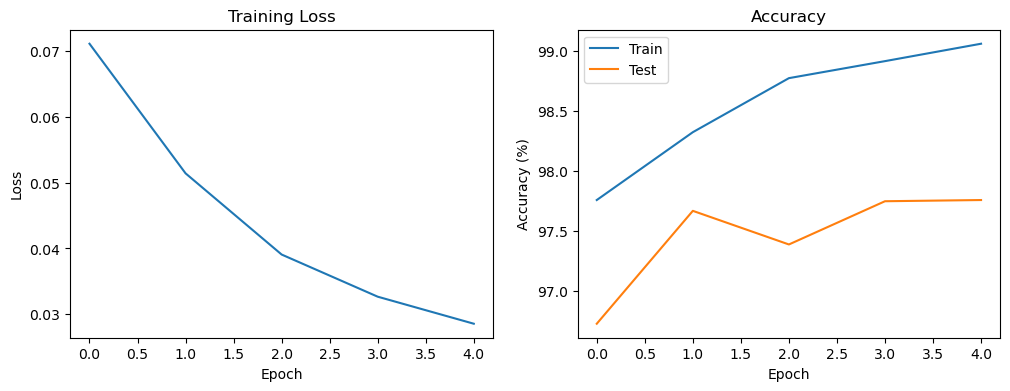

In [54]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')

plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Train')
plt.plot(test_accs, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Accuracy')
plt.show()

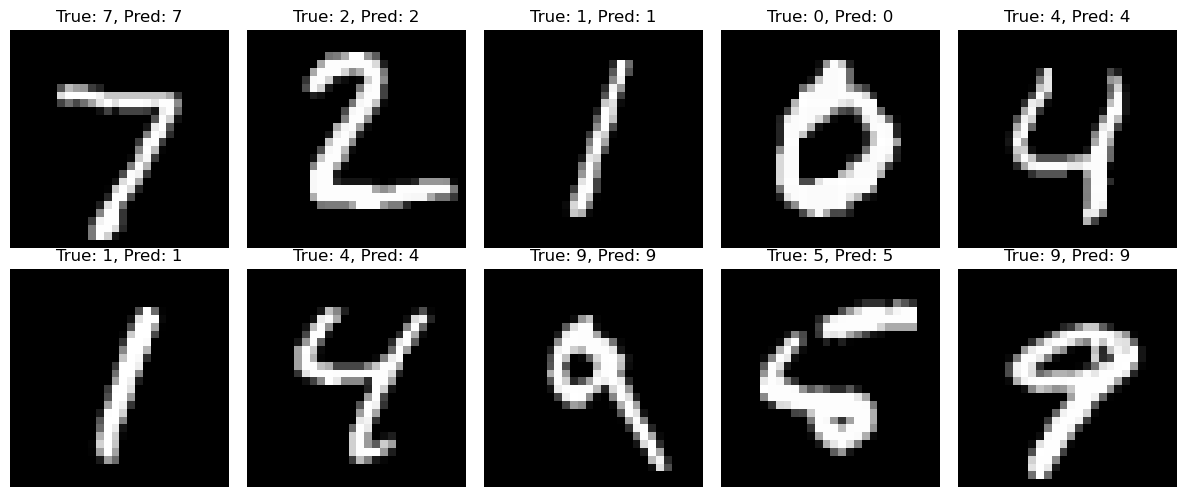

In [56]:
model.eval()
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
with torch.no_grad():
    for i, ax in enumerate(axes.flat):
        img, label = test_dataset[i]
        output = model(img.unsqueeze(0).to(device))
        pred = output.argmax(1).item()
        
        ax.imshow(img.squeeze(), cmap='gray')
        color = 'red' if pred != label else 'black'
        ax.set_title(f'True: {label}, Pred: {pred}', color=color)
        ax.axis('off')
plt.tight_layout()
plt.show()